# **Predicting Passenger Survivor**
****

**Table content**
* **About Data**
* **Import Libraries**
* **load Datasets**
* **Explorer Datasets**
* **Data Split**
* **Data Cleaning**
* **Data Visualization**
* **Choose Model**
* **Fit Models**
* **Evaluate Model**
* **Fine The Model**

## **About Data**
RMS Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg. for more info click <a href='https://en.wikipedia.org/wiki/Titanic' style='text-decoration:none'>here</a>

<pre style="font-family: 'Brush Script MT', cursive, serif;">
<h3 style='font-size: 12'>Defination Of Feature Columns</h3>
<b>Survived:</b> Passager Survived 
0 = No 
1 = Yes
<b>Embarked:</b> Port of Embarkation 
C = Cherbourg
Q = Queenstown
S = Southampton
<b>Pclass:</b> ticket class
A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
<b>Sex:</b> passenger sex
<b>Age:</b> Age in years
Age is fractional if less than 1. 
If the age is estimated, is it in the form of xx.5
<b>Sibsp:</b> of siblings / spouses aboard the Titanic
The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
<b>Parch:</b> of parents / children aboard the Titanic.
The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
<b>Ticket:</b> ticket number
<b>Fare:</b> fare paid for a ticket
<b>cabin:</b> Cabin number
</pre>

## **Import Libraries**

In [61]:
library(tidyverse)
library(tidymodels)
library(mice)
library(ggthemes)
library(corrplot)
library(naniar)
library(Hmisc)
library(gridExtra)

## **Setting Notebook**

In [62]:
options(warn=-1)

# Configure plot width and height.
options(repr.plot.width=12, repr.plot.height=6)

# Set the result seed for reproducibly.
set.seed(0)

## **Load Datasets**

In [63]:
load_data <- function(train_path, test_path) {
    # Instantiate the train dataframe
    train_df <- readr::read_csv(train_path)

    # Instantiate the test dataframe
    test_df <- readr::read_csv(test_path)

    return(list(train = train_df, test = test_df))
}

In [64]:
# Initialize the data path
train_path <- "../datasets/train.csv"
test_path <- "../datasets/test.csv"

# Assign datasets to vector of dataframe
datasets <- load_data(train_path, test_path)

# Instantiate train and test dataframe
train_df <- datasets$train
test_df <- datasets$test

Rows: 891 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Sex, Ticket, Cabin, Embarked
dbl (7): PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 418 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Sex, Ticket, Cabin, Embarked
dbl (6): PassengerId, Pclass, Age, SibSp, Parch, Fare

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## **Explorer Datasets**
---

### **Train And Test Dataframe**

#### **Train**

In [65]:
# Check out the first six row in train data frame
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


#### **Test**

In [66]:
# And First six rows in test dataframe
head(test_df)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NA,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NA,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NA,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NA,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NA,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NA,S


### **Structure Of The Dataframe**

#### **Train**

In [67]:
# View train data information
str(train_df)

spec_tbl_df [891 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ PassengerId: num [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : num [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : num [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : num [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : num [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] NA "C85" NA "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Survived = col_double(),
  ..   Pclass = col_double(

#### **Test**

In [68]:
# View train data information
str(test_df)

spec_tbl_df [418 × 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ PassengerId: num [1:418] 892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : num [1:418] 3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr [1:418] "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr [1:418] "male" "female" "male" "male" ...
 $ Age        : num [1:418] 34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : num [1:418] 0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : num [1:418] 0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr [1:418] "330911" "363272" "240276" "315154" ...
 $ Fare       : num [1:418] 7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr [1:418] NA NA NA NA ...
 $ Embarked   : chr [1:418] "Q" "S" "Q" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Pclass = col_double(),
  ..   Name = col_character(),
  ..   Sex = col_character(),
  ..   Age = col_double(),
  ..   SibSp = col_double(),
  ..   Parch = col_dou

### **Data Description**

In [69]:
describe(train_df)

train_df 

 12  Variables      891  Observations
--------------------------------------------------------------------------------
PassengerId 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     891        0      891        1      446    297.3     45.5     90.0 
     .25      .50      .75      .90      .95 
   223.5    446.0    668.5    802.0    846.5 

lowest :   1   2   3   4   5, highest: 887 888 889 890 891
--------------------------------------------------------------------------------
Survived 
       n  missing distinct     Info      Sum     Mean      Gmd 
     891        0        2     0.71      342   0.3838   0.4735 

--------------------------------------------------------------------------------
Pclass 
       n  missing distinct     Info     Mean      Gmd 
     891        0        3     0.81    2.309   0.8631 
                            
Value          1     2     3
Frequency    216   184   491
Proportion 0.242 0.207 0.551
------------------------

In [70]:
describe(test_df)

test_df 

 11  Variables      418  Observations
--------------------------------------------------------------------------------
PassengerId 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     418        0      418        1     1100    139.7    912.9    933.7 
     .25      .50      .75      .90      .95 
   996.2   1100.5   1204.8   1267.3   1288.2 

lowest :  892  893  894  895  896, highest: 1305 1306 1307 1308 1309
--------------------------------------------------------------------------------
Pclass 
       n  missing distinct     Info     Mean      Gmd 
     418        0        3     0.83    2.266   0.8821 
                            
Value          1     2     3
Frequency    107    93   218
Proportion 0.256 0.222 0.522
--------------------------------------------------------------------------------
Name 
       n  missing distinct 
     418        0      418 

lowest : Abbott, Master. Eugene Joseph             Abelseth, Miss. Karen Marie             

## **Data Preprocessing**
---

Construct a test model for testing the change in data

In [71]:
test_model <- function(column_name, used_method, train_data, test_data){

        # Change the outcome variable to factor.
        df <- train_data %>% mutate(Survived = as.factor(Survived))
        test_df <- test_data %>% mutate(Survived = as.factor(Survived))

        # Initialize the model.
        model <- parsnip::rand_forest() %>%
                set_engine("ranger") %>%
                set_mode("classification")

        # Make a formula.
        model_formula <- as.formula(paste("Survived", "~", column_name))

        # Create a recipe.
        model_recipe <- recipes::recipe(model_formula, data=df)

        # Create a workflow.
        model_workflow <- workflows::workflow() %>%
                                add_model(model) %>%
                                add_recipe(model_recipe)

        # Fit the workflow.
        fitted_model <- model_workflow %>% fit(df)

        # Make prediction.
        pred_train = predict(fitted_model, df)
        pred_test = predict(fitted_model, test_df)
        

        

        # Construct a result data frame.
        result_df <- df %>% select(Survived) %>%
                bind_cols(pred_train)

        result_test_df <- test_df %>% select(Survived) %>%
                bind_cols(pred_test)                

        # Get the accuracy.
        score <- accuracy(result_df, truth=Survived, estimate=.pred_class) %>% 
                        bind_rows(accuracy(result_test_df, truth=Survived, estimate=.pred_class))
        
        # Change data into a data frame.
        score_df <- as.data.frame(score)

        # Assign new row names to the score.
        rownames(score_df) <- c('train', 'test')

        cat("Fill NaN with ", used_method, "\n")
        print(score_df)

        # 
        # print(score)

        # # Combine the metrics
        # metric_score <- metric_set(accuracy, sens, spec)
        # metric_score(result_df, truth=Survived, estimate=.pred_class)
}

### **Split Data**

*Split dataset into train and validation(testing) dataset*

In [72]:
sample <- initial_split(train_df, prop = 0.80, strata = Survived)
training_df <- training(sample)
validation_df <- testing(sample)

In [73]:
train_shape <- dim(training_df)
cat("Training_df shape:\n")
cat("\tNrow:", as.character(train_shape[1]), "\n")
cat("\tNcolumns:", as.character(train_shape[2]))

Training_df shape:
	Nrow: 712 
	Ncolumns: 12

In [74]:
valid_shape <- dim(validation_df)
cat("Validation_df shape:\n")
cat("\tNrow:", as.character(valid_shape[1]), "\n")
cat("\tNcolumns:", as.character(valid_shape[2]))

Validation_df shape:
	Nrow: 179 
	Ncolumns: 12

### **Data Cleaning**

#### **Checking For Missing Value(NaN)<br>And Cleaning**

In [75]:
check.nan <- function(data){
    #' Check for Missing values in the dataframe.
    #' :param data: To check missing values
    #' :return data.frame: A dataframe each column with
    #' it's percent and count of missing values
    
    # Get the total number of missing value by each column.
    total_of_missing <- colSums(is.na(data))

    # Get the data shape.
    data_dim <- dim(data)

    # Calculating the percentage of missing values.
    percent <- round(total_of_missing / data_dim[[1]] * 100, 3)

    # Construct a data frame for missing values.
    missing_values_df <- data.frame(total_of_missing, percent)

    return(missing_values_df)
}



check_missing_values <- function(data) {
    # Check for Missing values in the dataframe.
    # :param data: To check missing values
    # :return data.frame: A dataframe each column with
    # it's percent and count of missing values

    # Construct a data frame for missing values.
    missing_values_df <- check.nan(data)

    # Create a bar for missing values
    miss <- naniar::vis_miss(data)
        
    # Construct a ggplot for missing variables
    gg_miss <- gg_miss_var(data)

    grid.arrange(miss, gg_miss, nrow=1, ncol=2)
    return(missing_values_df)
}

#### **Train And Validation Data**

,total_of_missing,percent
,<dbl>,<dbl>
PassengerId,0,0.000
Survived,0,0.000
Pclass,0,0.000
Name,0,0.000
Sex,0,0.000
Age,177,19.865
SibSp,0,0.000
Parch,0,0.000
Ticket,0,0.000


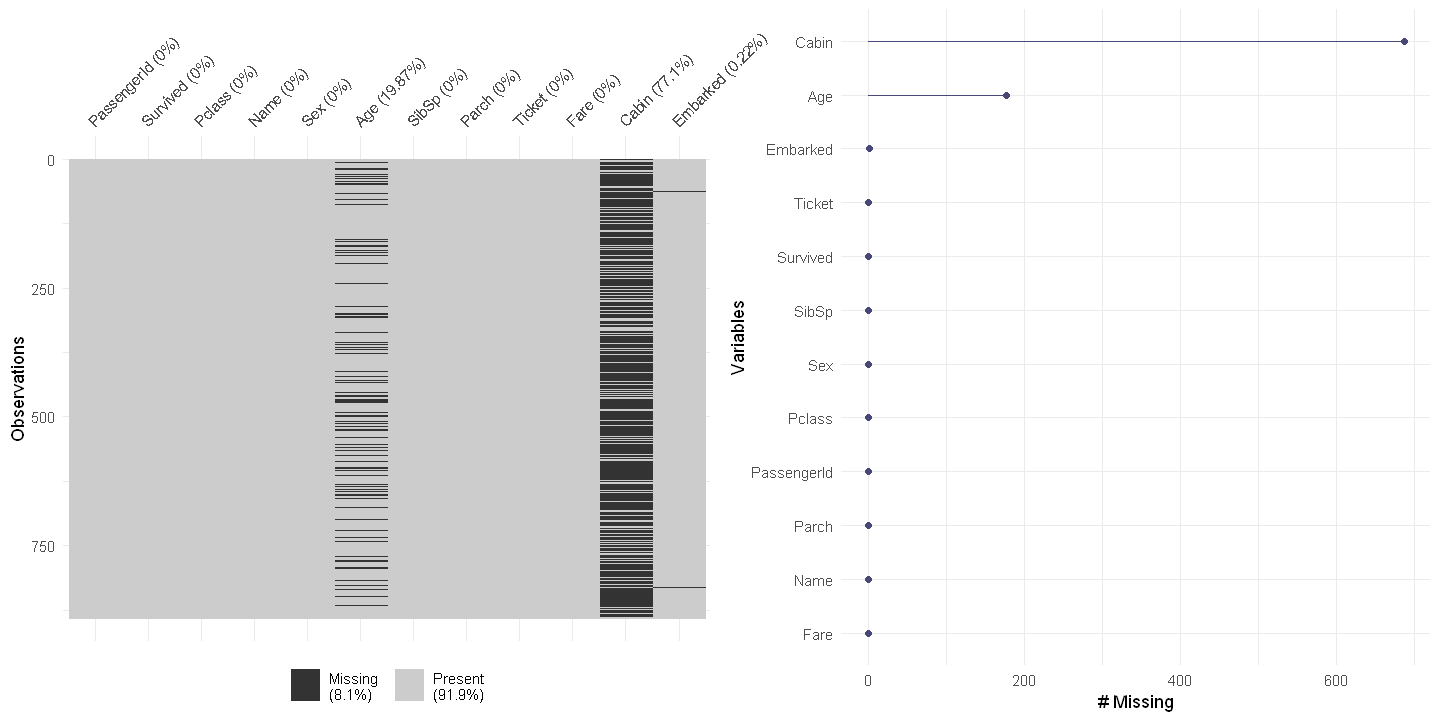

In [76]:
# Missing value check in full train data
check_missing_values(train_df)

A Function for getting the most frequent value from the column.

In [77]:
most_frequent_value <- function(data, col_name){
    # Returns the most frequent value.
    selected.column <- data %>% count(.data[[col_name]], sort=TRUE) %>% select(.data[[col_name]])
    return(selected.column[[col_name]][complete.cases(selected.column)][1])
}

**Fill Age**

The dataframe of missing values and bar chart shows it clearly that 19.9% of the data is missing in age column

In [83]:
# set the reproducibly result.
set.seed(0)

# Fill the missing values with the mean in age
training_df_mean = training_df %>% replace_na(list(Age = mean(training_df$Age, na.rm=TRUE)))
valid_df_mean = validation_df %>% replace_na(list(Age = mean(validation_df$Age, na.rm=TRUE)))

# Fill the missing values with the mean in age
training_df_mode = training_df %>% replace_na(list(Age = most_frequent_value(training_df, 'Age')))
valid_df_mode = validation_df %>% replace_na(list(Age = most_frequent_value(validation_df, 'Age')))

# Fill the missing values with the zero in age
training_df_zero = training_df %>% replace_na(list(Age = 0))
valid_df_zero = validation_df %>% replace_na(list(Age = 0))

# Fill the missing values with the median in age
training_df_median = training_df %>% replace_na(list(Age = median(training_df$Age, na.rm = TRUE)))
valid_df_median = validation_df %>% replace_na(list(Age = median(validation_df$Age, na.rm = TRUE)))

# Test data imputed with mean in age column.
test_model('Age', 'mean', training_df_mean, valid_df_mean)

cat("\n")

# Test data imputed with most column value in age column.
test_model('Age', 'mode', training_df_mode, valid_df_mode)

cat("\n")

# Test data imputed with most column value in age column.
test_model('Age', 'zero', training_df_zero, valid_df_zero)

cat("\n")

# Test data imputed with most column value in age column.
test_model('Age', 'median', training_df_median, valid_df_median)

Fill NaN with  mean 
       .metric .estimator .estimate
train accuracy     binary 0.6811798
test  accuracy     binary 0.5754190

Fill NaN with  mode 
       .metric .estimator .estimate
train accuracy     binary 0.6811798
test  accuracy     binary 0.5865922

Fill NaN with  zero 
       .metric .estimator .estimate
train accuracy     binary 0.6811798
test  accuracy     binary 0.5754190

Fill NaN with  median 
       .metric .estimator .estimate
train accuracy     binary 0.6811798
test  accuracy     binary 0.5698324


In [79]:
median(training_df$Age, na.rm = TRUE)

[1] 28

,total_of_missing,percent
,<dbl>,<dbl>
PassengerId,0,0.000
Pclass,0,0.000
Name,0,0.000
Sex,0,0.000
Age,86,20.574
SibSp,0,0.000
Parch,0,0.000
Ticket,0,0.000
Fare,1,0.239


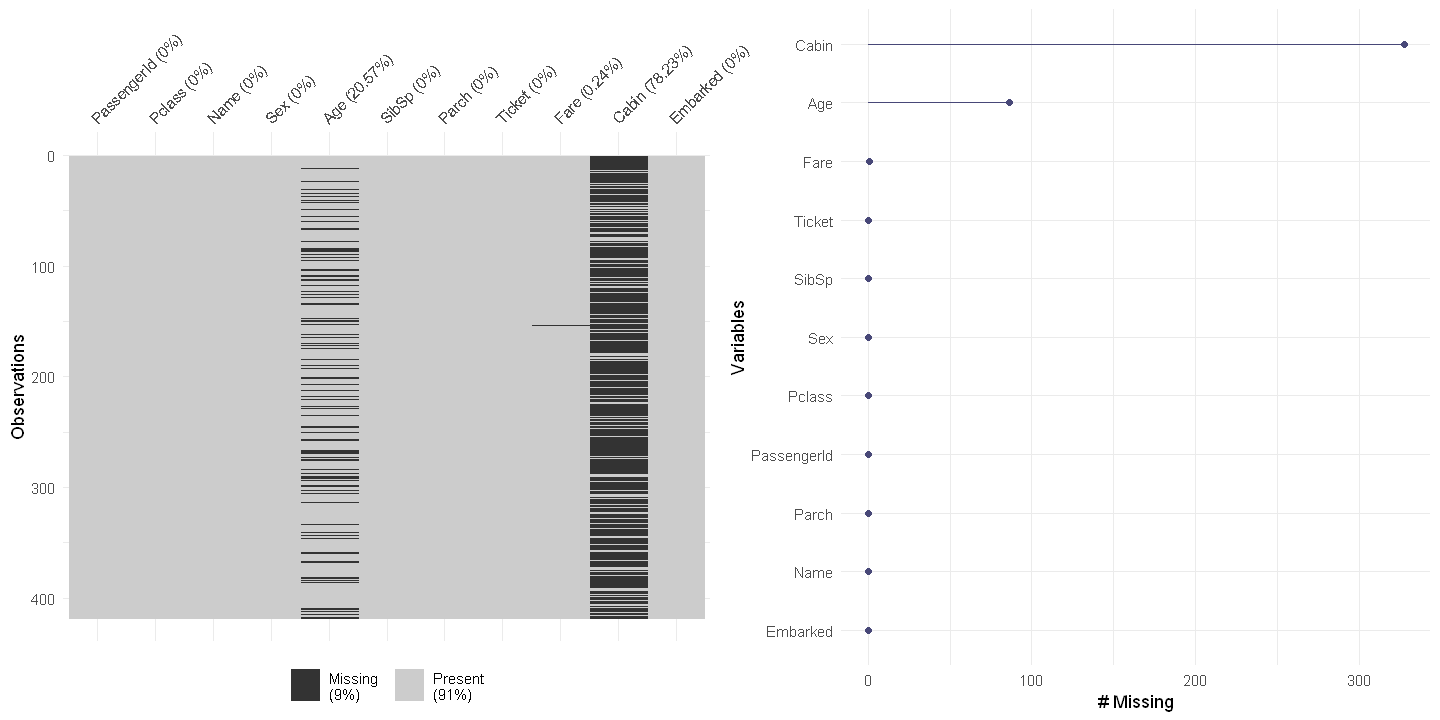

In [80]:
# Missing value check in test data
check_missing_values(test_df)